# Overfitting

We'll use a dataset on cars which contains 7 numerical features that could have an effect on a car's fuel efficiency:

- `cylinders` -- the number of cylinders in the engine.
- `displacement` -- the displacement of the engine.
- `horsepower` -- the horsepower of the engine.
- `weight` -- the weight of the car.
- `acceleration` -- the acceleration of the car.
- `model year` -- the year that car model was released (e.g. 70 corresponds
to 1970).
- `origin` -- where the car was manufactured (0 if North America, 1 if Europe, 2 if
Asia).

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

### Exploring and Cleaning the Data

In [3]:
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

In [4]:
filtered_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Training and Testing the model

In [5]:
def train_and_test(cols):
    lr = LinearRegression()
    lr.fit(filtered_cars[cols], filtered_cars['mpg'])
    predictions = lr.predict(filtered_cars[cols])
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)

In [6]:
cyl_mse, cyl_var = train_and_test(["cylinders"])
print(cyl_mse)
print(cyl_var)

24.02017956815553
36.74255887416017


In [7]:
weight_mse, weight_var = train_and_test(["weight"])
print(weight_mse)
print(weight_var)

18.6766165974193
42.08612184489641


### Training more complex models

In [16]:
one_mse, one_var = train_and_test(["cylinders"])
print(one_mse)
print(one_var)

24.02017956815553
36.74255887416017


In [17]:
two_mse, two_var = train_and_test(["cylinders", "displacement"])
print(two_mse)
print(two_var)

21.282057055586364
39.480681386729316


In [18]:
three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
print(three_mse)
print(three_var)

20.25295483971423
40.50978360260148


In [19]:
four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
print(four_mse)
print(four_var)

17.76386057184385
42.998877870471865


In [20]:
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
print(five_mse)
print(five_var)

17.76139610540622
43.00134233690939


In [21]:
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
print(six_mse)
print(six_var)

11.590170981415227
49.17256746090048


In [22]:
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])
print(seven_mse)
print(seven_var)

10.847480945000454
49.915257497315146


### Cross Validation

In [32]:
def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    mse_values = []
    var_values = []
    
    kf = KFold(n_splits = 10, shuffle = True, random_state = 3)
    
    for train_idx, test_idx in kf.split(features):
        X_train, X_test = features.iloc[train_idx], features.iloc[test_idx]
        y_train, y_test = target.iloc[train_idx], target.iloc[test_idx]
        
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)

        var_values.append(np.var(predictions))
        mse_values.append(mean_squared_error(y_test, predictions))
    
    return(np.mean(mse_values), np.mean(var_values))

In [33]:
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
print(two_mse)
print(two_var)

21.584370274954374
38.90252531375602


In [34]:
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
print(three_mse)
print(three_var)

20.655622193882955
40.09128795660694


In [35]:
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
print(four_mse)
print(four_var)

18.169683239081884
42.507643643644386


In [36]:
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
print(five_mse)
print(five_var)

18.283038517172052
42.598736300146825


In [37]:
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
print(six_mse)
print(six_var)

12.09968542546712
48.92824696771802


In [38]:
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])
print(seven_mse)
print(seven_var)

11.418131971812052
49.90431373098729


### Plotting cross-validation errors and variances

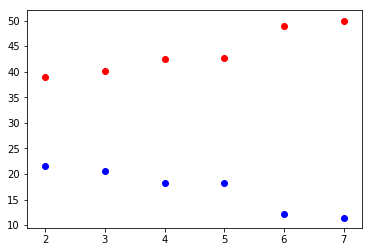

In [40]:
plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], c='b')
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var, five_var, six_var, seven_var], c='r')
plt.show()